In [1]:
import sys
import os
import glob
import re 
import pandas as pd
import numpy as np
from lxml import etree
import requests
import time
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
sys.path.append(os.path.abspath("C:/Users/calvotello/Dropbox/MTB/Göttingen/research/"))

In [3]:
color = "#669999"
cmap_20 = "tab20_r"
figsize = (10,5)

In [4]:
from librarian_robot import downloading_datasets, map_classications_systems, tokenize, statistical_tests, visualize

# Read Data

In [5]:
df = pd.read_parquet("./../data/exemplars_secondary_literature.parquet")

In [6]:
df

medium                                              title  \
ppn                                                                    
1642067407    Aau                                              Camus   
1678415065    Oau   Livre et société dans la France du XVIIIe siècle   
1678415065    Oau   Livre et société dans la France du XVIIIe siècle   
1678415065    Oau   Livre et société dans la France du XVIIIe siècle   
1678415065    Oau   Livre et société dans la France du XVIIIe siècle   
...           ...                                                ...   
448323834     Oax                          Avantgarde und Revolution   
448323834     Oax                          Avantgarde und Revolution   
44832184X     Oax  Die @Frau im spanischen Roman nach dem Bürgerk...   
44832184X     Oax  Die @Frau im spanischen Roman nach dem Bürgerk...   
44832184X     Oax  Die @Frau im spanischen Roman nach dem Bürgerk...   

                                             title_supplement  year  \
ppn                                                                   
1642067407                                               None  1987   
1678415065                                                [1]  2019   
1678415065                                                [1]  2019   
1678415065                                                [1]  2019   
1678415065                                                [1]  2019   
...                                                       ...   ...   
448323834   Mexikanische Lyrik von López Velarde bis Octav...  1987   
448323834   Mexikanische Lyrik von López Velarde bis Octav...  1987   
44832184X   Camilo José Cela, Carmen Laforet, Ana María Ma...  1982   
44832184X   Camilo José Cela, Carmen Laforet, Ana María Ma...  1982   
44832184X   Camilo José Cela, Carmen Laforet, Ana María Ma...  1982   

                entry_first author_first_name author_last_name author_gnd_id  \
ppn                                                                            
1642067407  HDBSRO:13-09-18            Morvan         Lebesque     077112679   
1678415065     EBP:08-10-19              None             None          None   
1678415065     EBP:08-10-19              None             None          None   
1678415065     EBP:08-10-19              None             None          None   
1678415065     EBP:08-10-19              None             None          None   
...                     ...               ...              ...           ...   
448323834     6055:07-05-19              None             None          None   
448323834     6055:07-05-19              None             None          None   
44832184X     6055:07-05-19            Sylvia            Truxa          None   
44832184X     6055:07-05-19            Sylvia            Truxa          None   
44832184X     6055:07-05-19            Sylvia            Truxa          None   

           editor_first_name editor_last_name  ...  \
ppn                                            ...   
1642067407              None             None  ...   
1678415065         Geneviève          Bollème  ...   
1678415065         Geneviève          Bollème  ...   
1678415065         Geneviève          Bollème  ...   
1678415065         Geneviève          Bollème  ...   
...                      ...              ...  ...   
448323834              Klaus  Meyer-Minnemann  ...   
448323834              Klaus  Meyer-Minnemann  ...   
44832184X               None             None  ...   
44832184X               None             None  ...   
44832184X               None             None  ...   

                                           keyword_einzel_ppn  \
ppn                                                             
1642067407                                               None   
1678415065                                               None   
1678415065                                               None   
1678415065                                               None   
1678415065      

In [7]:
df.columns.tolist()

['medium',
 'title',
 'title_supplement',
 'year',
 'entry_first',
 'author_first_name',
 'author_last_name',
 'author_gnd_id',
 'editor_first_name',
 'editor_last_name',
 'editor_gnd_id',
 'isbn',
 'ILNs',
 'content_type',
 'publisher',
 'language_text',
 'language_original',
 'pages',
 'format',
 'comment_isbn',
 'place_publication',
 'summary',
 'title_continuing_resource',
 'work_ppn',
 'work_info',
 'work_title',
 'expression_ppn',
 'expression_info',
 'expression_title',
 'DDC_notation',
 'DDC_sachgruppe',
 'DDC_grundnotation',
 'BK_ppn',
 'BK_notation',
 'BK_j',
 'RVK_ppn',
 'RVK_notation',
 'RVK_j',
 'RVK_k',
 'keyword_RSWK',
 'keyword_K10plus',
 'keyword_project',
 'keyword_local',
 'keyword_045D',
 'keyword_LoC',
 'lcc_notation',
 'klassifikationssystem_system',
 'klassifikationssystem_notation',
 'uri_description',
 'uri',
 'GOK_ppn',
 'GOK_notation',
 'GOK_j',
 'signatur_place',
 'signatur',
 'signatur_date',
 'Abrufzeichen',
 'query',
 'year_publication',
 'literary_texts'

In [9]:
df.shape

(1041157, 77)

# Medium

In [10]:
df["medium"].notna().sum() / df.shape[0] * 100

100.0

In [11]:
df["medium_1_letter"] = df["medium"].str.get(0)

In [12]:
df["medium_1_letter_standard"] = df["medium_1_letter"]

In [13]:
df["medium_1_letter_standard"].value_counts()

A    910619
O    105039
B     12949
S      4327
Z      4073
E      3465
G       626
V        32
M        24
a         2
K         1
Name: medium_1_letter_standard, dtype: int64

In [14]:
media_dc = {"A": "Printed material", "B": "Audio carriers, video carriers, visual representations", "O": "Remote electronic resource", "S": "Electronic resource on data carrier", }


In [15]:
media_lt = list(media_dc.values())

In [16]:
df["medium_1_letter_standard"] = df["medium_1_letter_standard"].map(media_dc)

In [17]:
df["medium_1_letter_standard"]

ppn
1642067407              Printed material
1678415065    Remote electronic resource
1678415065    Remote electronic resource
1678415065    Remote electronic resource
1678415065    Remote electronic resource
                         ...            
448323834     Remote electronic resource
448323834     Remote electronic resource
44832184X     Remote electronic resource
44832184X     Remote electronic resource
44832184X     Remote electronic resource
Name: medium_1_letter_standard, Length: 1041157, dtype: object

In [18]:
#visualize.counter_bar_plot(df.loc[(df["medium_1_letter_standard"].isin(media_lt) )], "medium_1_letter_standard", )


In [19]:
"""
def bar_counter(df, column_to_count, percentage = True, color = color, title = "", figsize = (10,5), xlabel = "", ylabel = "", wdir = "./../visualizations/", figure_name = "bar_counter"):
    #    bar_counter(df.loc[(df["medium_1_letter_standard"].isin(media_lt) )], "medium_1_letter_standard", title = "Percentage of medium of records", xlabel= "percentage", ylabel = "medium", figure_name = "")

    ax = (df[column_to_count].value_counts(normalize=True)*100).plot.barh(color = color, grid=True, figsize = figsize, fontsize=12, title = title)
    ax.set_axisbelow(True)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)

    plt.tight_layout()

    fig = ax.get_figure()
    fig.savefig( wdir + figure_name + ".png", dpi=300, format="png")
    fig.show()
"""

'\ndef bar_counter(df, column_to_count, percentage = True, color = color, title = "", figsize = (10,5), xlabel = "", ylabel = "", wdir = "./../visualizations/", figure_name = "bar_counter"):\n    #    bar_counter(df.loc[(df["medium_1_letter_standard"].isin(media_lt) )], "medium_1_letter_standard", title = "Percentage of medium of records", xlabel= "percentage", ylabel = "medium", figure_name = "")\n\n    ax = (df[column_to_count].value_counts(normalize=True)*100).plot.barh(color = color, grid=True, figsize = figsize, fontsize=12, title = title)\n    ax.set_axisbelow(True)\n    ax.set_xlabel(xlabel, fontsize=12)\n    ax.set_ylabel(ylabel, fontsize=12)\n\n    plt.tight_layout()\n\n    fig = ax.get_figure()\n    fig.savefig( wdir + figure_name + ".png", dpi=300, format="png")\n    fig.show()\n'

C:\Users\calvotello\Dropbox\MTB\Göttingen\research\librarian_robot\visualize.py:120: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


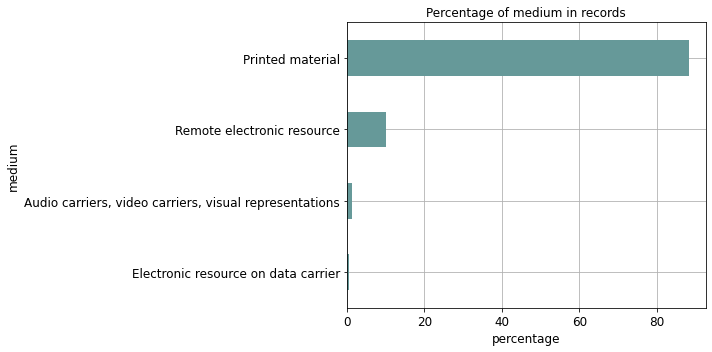

In [20]:
visualize.plot_bar_counter(df.loc[(df["medium_1_letter_standard"].isin(media_lt) )], "medium_1_letter_standard", title = "Percentage of medium in records", xlabel= "percentage", ylabel = "medium", figure_name = "bar_medium_percentage", figsize = (10,5))

In [21]:
(df.loc[(df["medium_1_letter_standard"].isin(media_lt) )]["medium_1_letter_standard"].value_counts(normalize=True)*100).round(2)

Printed material                                          88.16
Remote electronic resource                                10.17
Audio carriers, video carriers, visual representations     1.25
Electronic resource on data carrier                        0.42
Name: medium_1_letter_standard, dtype: float64

In [22]:
df["medium_stand"] = df["medium_1_letter_standard"] 

<AxesSubplot:>

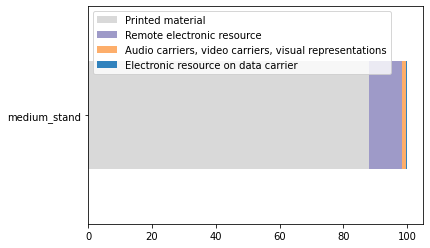

In [23]:
pd.DataFrame(df.loc[(df["medium_stand"].isin(media_lt) )]["medium_stand"].value_counts(normalize=True)*100).T.plot.barh(stacked=True, cmap = "tab20c_r")

<AxesSubplot:xlabel='year_publication'>

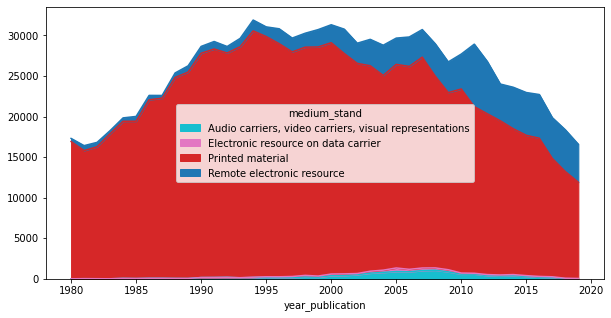

In [24]:
df.loc[(df["medium_stand"].isin(media_lt) )].groupby(["medium_stand", "year_publication"])["medium_stand"].count().unstack().T.plot.area(figsize=(10,5), cmap= "tab10_r")


In [25]:
years_medium_df = df.loc[(df["medium_stand"].isin(media_lt) )].groupby(["medium_stand", "year_publication"])["medium_stand"].count().unstack().T.fillna(0)

In [26]:
years_medium_rel_df = years_medium_df.loc[:].div(df.groupby("year_publication")["ppn"].count(), axis="index")*100

In [27]:
years_medium_rel_df.round(2)

medium_stand      Audio carriers, video carriers, visual representations  \
year_publication                                                           
1980                                                           0.08        
1981                                                           0.16        
1982                                                           0.12        
1983                                                           0.08        
1984                                                           0.31        
1985                                                           0.22        
1986                                                           0.32        
1987                                                           0.32        
1988                                                           0.22        
1989                                                           0.19        
1990                                                           0.58        
1991                                                           0.59        
1992                                                           0.68        
1993                                                           0.45        
1994                                                           0.54        
1995                                                           0.64        
1996                                                           0.55        
1997                                                           0.58        
1998                                                           0.75        
1999                                                           0.66        
2000                                                           1.26        
2001                                                           1.35        
2002                                                           1.77        
2003                                                           2.38        
2004                                                           2.75        
2005                                                           3.01        
2006                                                           2.91        
2007                                                           3.30        
2008                                                           3.67        
2009                                                           3.22        
2010                                                           2.11        
2011                                                           2.06        
2012                                                           1.52        
2013                                                           1.44        
2014                                                           1.65        
2015                                                           1.35        
2016                                                           0.96        
2017                                                           0.94        
2018                                                           0.16        
2019                                                           0.12        

medium_stand      Electronic resource on data carrier  Printed material  \
year_publication                                                          
1980                                             0.00             97.55   
1981                                             0.00             95.61   
1982                                             0.00             96.48   
1983                                             0.01             97.47   
1984                                             0.00             97.16   
1985                                             0.02             96.50   
1986                                             0.00             97.06   
1987                                             0.00             97.87   
1988                                             0.00    

In [28]:
years_medium_rel_df.sum(axis=1)

year_publication
1980    99.867282
1981    99.472951
1982    99.839744
1983    99.699831
1984    99.583354
1985    99.701151
1986    99.801360
1987    99.673649
1988    99.556637
1989    99.616742
1990    99.399660
1991    99.266927
1992    99.271920
1993    99.302972
1994    98.856240
1995    98.527685
1996    98.224588
1997    98.072982
1998    98.202583
1999    98.660671
2000    98.975883
2001    99.312571
2002    99.356693
2003    99.303523
2004    98.430769
2005    98.525505
2006    98.918094
2007    99.340318
2008    99.181647
2009    99.368100
2010    99.358009
2011    99.676041
2012    99.494893
2013    99.494426
2014    99.658112
2015    99.536174
2016    99.649061
2017    99.514125
2018    99.555580
2019    99.687425
dtype: float64

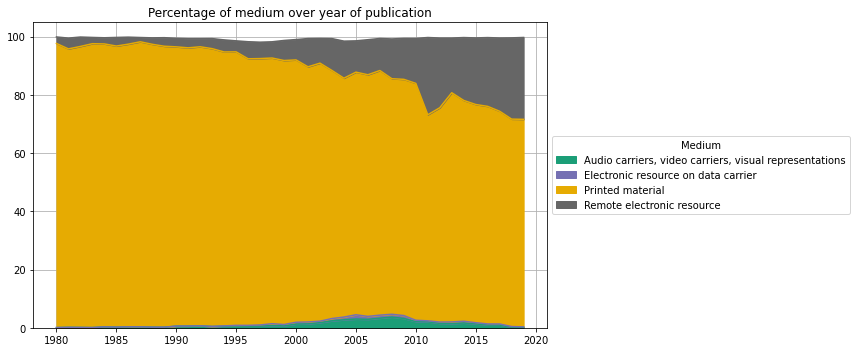

In [29]:
visualize.plot_area(years_medium_rel_df, title = "Percentage of medium over year of publication", cmap="Dark2", legend_title = "Medium", figure_name = "figure_14_area_medium_develope")

In [30]:
years_medium_rel_df.tail(10).mean()

medium_stand
Audio carriers, video carriers, visual representations     1.230693
Electronic resource on data carrier                        0.405095
Printed material                                          74.531188
Remote electronic resource                                23.395409
dtype: float64

In [31]:
years_medium_rel_df.tail(2).mean()

medium_stand
Audio carriers, video carriers, visual representations     0.141407
Electronic resource on data carrier                        0.234677
Printed material                                          71.238386
Remote electronic resource                                28.007032
dtype: float64

C:\Users\calvotello\Dropbox\MTB\Göttingen\research\librarian_robot\visualize.py:181: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


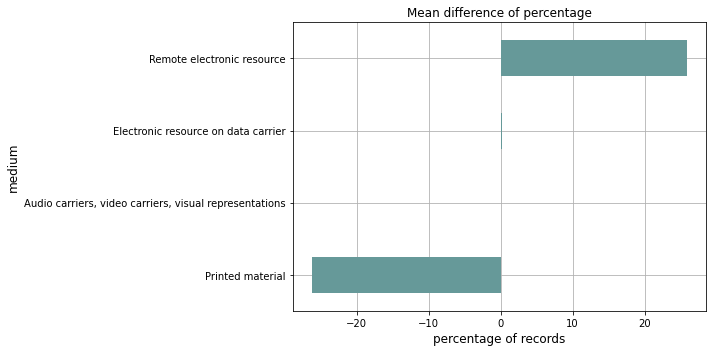

In [32]:
visualize.plot_bars(years_medium_rel_df.diff(), percentage = False, title = "Mean difference of percentage", xlabel= "percentage of records", ylabel = "medium", figure_name = "bar_medium_diff")

In [33]:
#media_year_df = df.loc[(df["medium_stand"].isin(media_lt) )].groupby(["medium_stand", "year_publication"])["medium_stand"].count().unstack().T

In [34]:
#media_year_df.head()

In [35]:
#media_year_df

In [36]:
#media_year_rel_df = df.loc[(df["medium_stand"].isin(media_lt) )].groupby(["medium_stand", "year_publication"])["medium_stand"].count().unstack().apply(lambda x: (x/x.sum()) * 100, axis=0).T

In [37]:
#media_year_rel_df.head()

In [38]:
statistical_results_medium_df = statistical_tests.calculate_regression_line(years_medium_rel_df)


In [39]:
statistical_results_medium_df["expectation_2020"] = (statistical_results_medium_df["slope"] * 2020) + statistical_results_medium_df["intercept"]

In [40]:
statistical_results_medium_df["expectation_2030"] = (statistical_results_medium_df["slope"] * 2030) + statistical_results_medium_df["intercept"]

In [41]:
statistical_results_medium_df["expectation_2040"] = (statistical_results_medium_df["slope"] * 2040) + statistical_results_medium_df["intercept"]

In [42]:
statistical_results_medium_df["expectation_2100"] = (statistical_results_medium_df["slope"] * 2100) + statistical_results_medium_df["intercept"]

In [43]:
statistical_results_medium_df["expectation_2150"] = (statistical_results_medium_df["slope"] * 2150) + statistical_results_medium_df["intercept"]

In [44]:
statistical_results_medium_df["expectation_2130"] = (statistical_results_medium_df["slope"] * 2130) + statistical_results_medium_df["intercept"]

In [45]:
statistical_results_medium_df["expectation_2200"] = (statistical_results_medium_df["slope"] * 2200) + statistical_results_medium_df["intercept"]

In [46]:
statistical_results_medium_df.round(2)

column  \
column                                                                                                  
Remote electronic resource                                                 Remote electronic resource   
Audio carriers, video carriers, visual represen...  Audio carriers, video carriers, visual represe...   
Electronic resource on data carrier                               Electronic resource on data carrier   
Printed material                                                                     Printed material   

                                                    slope  intercept  rvalue  \
column                                                                         
Remote electronic resource                           0.68   -1345.80    0.92   
Audio carriers, video carriers, visual represen...   0.05     -95.87    0.54   
Electronic resource on data carrier                  0.02     -38.05    0.59   
Printed material                                    -0.75    1584.26   -0.96   

                                                    pvalue  stderr  \
column                                                               
Remote electronic resource                             0.0    0.05   
Audio carriers, video carriers, visual represen...     0.0    0.01   
Electronic resource on data carrier                    0.0    0.00   
Printed material                                       0.0    0.04   

                                                    expectation_2020  \
column                                                                 
Remote electronic resource                                     24.25   
Audio carriers, video carriers, visual represen...              2.14   
Electronic resource on data carrier                             0.78   
Printed material                                               72.05   

                                                    expectation_2030  \
column                                                                 
Remote electronic resource                                     31.04   
Audio carriers, video carriers, visual represen...              2.63   
Electronic resource on data carrier                             0.97   
Printed material                                               64.56   

                                                    expectation_2040  \
column                                                                 
Remote electronic resource                                     37.82   
Audio carriers, video carriers, visual represen...              3.11   
Electronic resource on data carrier                             1.16   
Printed material                                               57.07   

                                                    expectation_2100  \
column                                                                 
Remote electronic resource                                     78.51   
Audio carriers, video carriers, visual represen...              6.03   
Electronic resource on data carrier                             2.31   
Printed material                                               12.16   

                                                    expectation_2150  \
column                                                                 
Remote electronic resource                                    112.43   
Audio carriers, video carriers, visual represen...              8.45   
Electronic resource on data carrier                             3.27   
Printed material                                              -25.27   

                                                    expectation_2130  \
column                                                                 
Remote electronic resource                                     98.86   
Audio carriers, video carriers, visual represen...              7.48   
Electronic resource on data carrier                             2.89   
Printed material                     

C:\Users\calvotello\Dropbox\MTB\Göttingen\research\librarian_robot\visualize.py:181: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


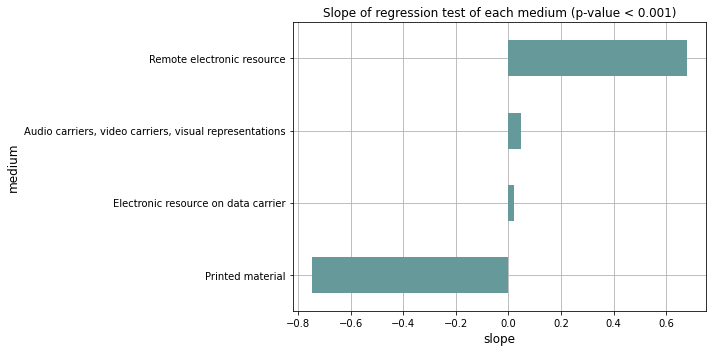

In [47]:
visualize.plot_bars(statistical_results_medium_df.loc[statistical_results_medium_df["pvalue"] < 0.001][["slope"]].head(20).T, title ="Slope of regression test of each medium (p-value < 0.001)", xlabel ="slope", ylabel = "medium", figure_name = "bar_slop_medium")

In [48]:
years_medium_rel_df.tail(20)


medium_stand      Audio carriers, video carriers, visual representations  \
year_publication                                                           
2000                                                       1.264342        
2001                                                       1.349040        
2002                                                       1.769094        
2003                                                       2.378789        
2004                                                       2.745299        
2005                                                       3.005446        
2006                                                       2.907208        
2007                                                       3.304876        
2008                                                       3.670604        
2009                                                       3.218972        
2010                                                       2.105301        
2011                                                       2.060932        
2012                                                       1.519034        
2013                                                       1.437984        
2014                                                       1.650346        
2015                                                       1.348130        
2016                                                       0.960695        
2017                                                       0.941695        
2018                                                       0.162593        
2019                                                       0.120221        

medium_stand      Electronic resource on data carrier  Printed material  \
year_publication                                                          
2000                                         0.632171         90.078073   
2001                                         0.655156         87.610134   
2002                                         0.496168         88.601834   
2003                                         0.804145         85.172101   
2004                                         0.943590         82.010256   
2005                                         1.464532         83.305659   
2006                                         1.008894         82.968273   
2007                                         1.041262         83.989781   
2008                                         0.972436         80.879986   
2009                                         0.985020         81.106196   
2010                                         0.484183         81.332042   
2011                                         0.330852         70.750620   
2012                                         0.453110         73.582173   
2013                                         0.576023         78.699598   
2014                                         0.595138         75.818842   
2015                                         0.403138         74.923057   
2016                                         0.368486         74.697315   
2017                                         0.370667         73.031457   
2018                                         0.270988         71.215652   
2019                                         0.198365         71.261120   

medium_stand      Remote electronic resource  
year_publication                              
2000                                7.001296  
2001                                9.698241  
2002                                8.489598  
2003                               10.948488  
2004                               12.731624  
2005                               10.749867  
2006                               12.033718  
2007                               11.004398  
2008                               13.658620  
2009                               14.057912  
2010                               15.436482  
2011                               26.533637  
2012              

In [49]:
statistical_results_medium_20_df = statistical_tests.calculate_regression_line(years_medium_rel_df.tail(20))


In [50]:
statistical_results_medium_20_df["expectation_2020"] = (statistical_results_medium_20_df["slope"] * 2020) + statistical_results_medium_20_df["intercept"]

In [51]:
statistical_results_medium_20_df["expectation_2030"] = (statistical_results_medium_20_df["slope"] * 2030) + statistical_results_medium_20_df["intercept"]

In [52]:
statistical_results_medium_20_df["expectation_2040"] = (statistical_results_medium_20_df["slope"] * 2040) + statistical_results_medium_20_df["intercept"]

In [53]:
statistical_results_medium_20_df["expectation_2090"] = (statistical_results_medium_20_df["slope"] * 2090) + statistical_results_medium_20_df["intercept"]

In [54]:
statistical_results_medium_20_df["expectation_2080"] = (statistical_results_medium_20_df["slope"] * 2080) + statistical_results_medium_20_df["intercept"]

In [55]:
statistical_results_medium_20_df["expectation_2085"] = (statistical_results_medium_20_df["slope"] * 2085) + statistical_results_medium_20_df["intercept"]

In [56]:
statistical_results_medium_20_df["expectation_2100"] = (statistical_results_medium_20_df["slope"] * 2100) + statistical_results_medium_20_df["intercept"]

In [57]:
statistical_results_medium_20_df

column  \
column                                                                                                  
Remote electronic resource                                                 Remote electronic resource   
Electronic resource on data carrier                               Electronic resource on data carrier   
Audio carriers, video carriers, visual represen...  Audio carriers, video carriers, visual represe...   
Printed material                                                                     Printed material   

                                                       slope    intercept  \
column                                                                      
Remote electronic resource                          1.117651 -2228.702714   
Electronic resource on data carrier                -0.033448    67.865530   
Audio carriers, video carriers, visual represen... -0.094342   191.477017   
Printed material                                   -0.949908  1988.391966   

                                                      rvalue        pvalue  \
column                                                                       
Remote electronic resource                          0.934013  1.770388e-09   
Electronic resource on data carrier                -0.604216  4.779051e-03   
Audio carriers, video carriers, visual represen... -0.550463  1.190347e-02   
Printed material                                   -0.924816  5.536310e-09   

                                                      stderr  \
column                                                         
Remote electronic resource                          0.100757   
Electronic resource on data carrier                 0.010397   
Audio carriers, video carriers, visual represen...  0.033725   
Printed material                                    0.092097   

                                                    expectation_2020  \
column                                                                 
Remote electronic resource                                 28.951725   
Electronic resource on data carrier                         0.301517   
Audio carriers, video carriers, visual represen...          0.905435   
Printed material                                           69.577674   

                                                    expectation_2030  \
column                                                                 
Remote electronic resource                                 40.128232   
Electronic resource on data carrier                        -0.032958   
Audio carriers, video carriers, visual represen...         -0.037988   
Printed material                                           60.078593   

                                                    expectation_2040  \
column                                                                 
Remote electronic resource                                 51.304739   
Electronic resource on data carrier                        -0.367433   
Audio carriers, video carriers, visual represen...         -0.981412   
Printed material                                           50.579513   

                                                    expectation_2090  \
column                                                                 
Remote electronic resource                                107.187275   
Electronic resource on data carrier                        -2.039810   
Audio carriers, video carriers, visual represen...         -5.698530   
Printed material                                            3.084109   

                                                    expectation_2080  \
column                                                                 
Remote electronic resource                                 96.010768   
Electronic resource on data carrier                        -1.705335   
Audio carriers, video carriers, visual represen...         -4.755107   
Printed material                                       

C:\Users\calvotello\Dropbox\MTB\Göttingen\research\librarian_robot\visualize.py:181: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


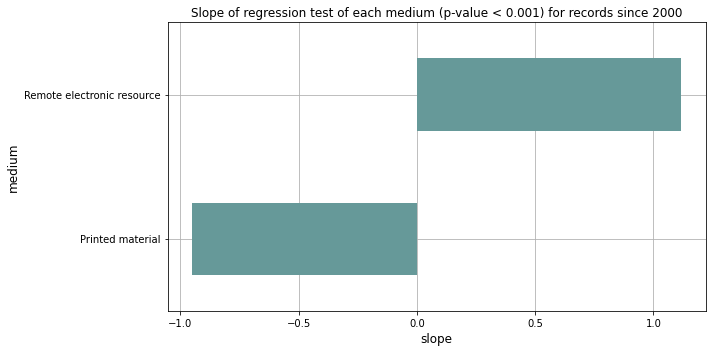

In [58]:
visualize.plot_bars(statistical_results_medium_20_df.loc[statistical_results_medium_20_df["pvalue"] < 0.001][["slope"]].head(20).T, title ="Slope of regression test of each medium (p-value < 0.001) for records since 2000", xlabel ="slope", ylabel = "medium", figure_name = "figure_15_bar_slop_medium")

# Languages

In [59]:
round(df["language_text"].notna().sum() / df.shape[0], 2)*100


98.0

In [60]:
df["language_text"].sample(20)

ppn
140597395                 fre
623528630                 ita
1128822423                spa
55994800X                 ita
271455497                 ger
024097977                 ger
247920576                 ita
1191628701        fre|ger|eng
1655987291                spa
1107782503                spa
67976738X                 ger
682760900                 spa
014100819                 spa
022929894                 spa
300251238                 eng
008120064                 ger
544081846     ger|spa|fre|eng
105298867                 fre
245692754                 und
557906369                 arg
Name: language_text, dtype: object

In [61]:
(df.loc[df["language_text"].fillna("").str.contains("und")].shape[0] / df.shape[0])* 100


0.36901255046068937

In [62]:
df.loc[df["language_text"].fillna("").str.contains("und")][["language_text","source","title","year"]].sample(10)

language_text source  \
ppn                              
402518217           und  hebis   
402518608           und  hebis   
23392972X           und  hebis   
353338931           und  hebis   
362419337           und  hebis   
353385212           und  hebis   
233399496           und  hebis   
246300027           und  hebis   
233762248           und  hebis   
233652167           und  hebis   

                                                       title  year  
ppn                                                                 
402518217                           Correspondance et poésie  2011  
402518608             Femmes et libertinage au xviiie siècle  2004  
23392972X                                 Fräulein Christine  1980  
353338931  Le @chansonnier français de la Burgerbibliothe...  2011  
362419337  Geschichte der italienischen Literatur in Öste...  2011  
353385212                       La @Vie de sainte Marguerite  1990  
233399496                             Anthologie rhétoromane  1982  
246300027                                Luis Rafael Sanchez  1985  
233762248                  Jean Cocteau and the French scene  1984  
233652167                            Inedito poeta romantico  1984

In [63]:
df.loc[df["language_text"].fillna("").str.contains("und")]["source"].value_counts()

hebis      3789
k10plus      53
Name: source, dtype: int64

In [64]:
df.loc[df["language_text"].fillna("").str.contains("mul")][["language_text","source","title","year"]].sample(10)

language_text   source  \
ppn                                                
1013632117                          mul  k10plus   
1013632141                          mul  k10plus   
640325343               mul|ger|ita|roh  k10plus   
1013632109                          mul  k10plus   
1013632117                          mul  k10plus   
450623769                           mul    hebis   
1013632141                          mul  k10plus   
73825116X               mul|spa|ita|fre  k10plus   
1655671790                          mul  k10plus   
885618009   ger|mul|spa|eng|fre|ita|por  k10plus   

                                                        title  year  
ppn                                                                  
1013632117                          Galegisch, Portugiesisch.  2010  
1013632141                          Okzitanisch, Katalanisch.  2010  
640325343                          Determinanten und Pronomen  2010  
1013632109  Geschichte des Faches Romanistik. Methodologie...  2011  
1013632117                          Galegisch, Portugiesisch.  2010  
450623769        Hugo von Hofmannsthals "Gabriele d'Annunzio"  1995  
1013632141                          Okzitanisch, Katalanisch.  2010  
73825116X                               Political correctness  2012  
1655671790       Lexikon der Romanistischen Linguistik (LRL).  2010  
885618009                        Streifzüge durch die Romania  2017

In [65]:
df["language_text"].value_counts().head(20)

fre        277211
ger        204635
spa        159772
ita        112835
eng         86612
ger|fre     29300
por         21413
ger|spa     16484
ger|ita      9606
fre|ger      9117
cat          8322
spa|ger      5547
eng|fre      5351
rum          4524
und          3788
fre|eng      3400
ger|por      3168
ita|ger      3123
eng|spa      2426
spa|eng      2145
Name: language_text, dtype: int64

In [66]:
languages_df = tokenize.tokenize_column(df, "language_text",  ngram_range=(1,1), analyzer="word",  reg_ex='(?u)\\b\\w+\\b', max_features = 300, add_name_of_original_column = False)

Shape of tokens:  (1041157, 177)
Shape of tokens after filtering:  (1041157, 177)


In [67]:
languages_df

fre  ger  spa  ita  eng  por  none  cat  rum  und  ...  cel  phi  \
1642067407    1    0    0    0    0    0     0    0    0    0  ...    0    0   
1678415065    1    0    0    0    0    0     0    0    0    0  ...    0    0   
1678415065    1    0    0    0    0    0     0    0    0    0  ...    0    0   
1678415065    1    0    0    0    0    0     0    0    0    0  ...    0    0   
1678415065    1    0    0    0    0    0     0    0    0    0  ...    0    0   
...         ...  ...  ...  ...  ...  ...   ...  ...  ...  ...  ...  ...  ...   
448323834     0    1    0    0    0    0     0    0    0    0  ...    0    0   
448323834     0    1    0    0    0    0     0    0    0    0  ...    0    0   
44832184X     0    1    0    0    0    0     0    0    0    0  ...    0    0   
44832184X     0    1    0    0    0    0     0    0    0    0  ...    0    0   
44832184X     0    1    0    0    0    0     0    0    0    0  ...    0    0   

            gem  nic  ful  kur  kik  fon  kal  ota  
1642067407    0    0    0    0    0    0    0    0  
1678415065    0    0    0    0    0    0    0    0  
1678415065    0    0    0    0    0    0    0    0  
1678415065    0    0    0    0    0    0    0    0  
1678415065    0    0    0    0    0    0    0    0  
...         ...  ...  ...  ...  ...  ...  ...  ...  
448323834     0    0    0    0    0    0    0    0  
448323834     0    0    0    0    0    0    0    0  
44832184X     0    0    0    0    0    0    0    0  
44832184X     0    0    0    0    0    0    0    0  
44832184X     0    0    0    0    0    0    0    0  

[1041157 rows x 177 columns]

In [68]:
languages_df.columns.tolist()

['fre',
 'ger',
 'spa',
 'ita',
 'eng',
 'por',
 'none',
 'cat',
 'rum',
 'und',
 'lat',
 'glg',
 'rus',
 'fro',
 'oci',
 'pol',
 'roh',
 'dut',
 'mul',
 'ara',
 'frm',
 'swe',
 'hun',
 'cpf',
 'pro',
 'lad',
 'crp',
 'srd',
 'srp',
 'heb',
 'roa',
 'cze',
 'dan',
 'grc',
 'hrv',
 'tur',
 'ast',
 'chi',
 'baq',
 'fin',
 'gre',
 'rom',
 'bul',
 'arg',
 'nor',
 'slv',
 'cpp',
 'que',
 'jpn',
 'pap',
 'nds',
 'gmh',
 'mac',
 'mis',
 'grn',
 'kor',
 'est',
 'bra',
 'alb',
 'qmo',
 'slo',
 'fur',
 'nah',
 'per',
 'geo',
 'bre',
 'ltz',
 'ukr',
 'hat',
 'cos',
 'hin',
 'sai',
 'vie',
 'mon',
 'arm',
 'enm',
 'myn',
 'gle',
 'ine',
 'lit',
 'cpe',
 'ber',
 'ang',
 'mlt',
 'swa',
 'yid',
 'epo',
 'kaz',
 'chu',
 'bos',
 'raj',
 'nap',
 'zxx',
 'uig',
 'tib',
 'tmh',
 'khm',
 'aym',
 'mlg',
 'gsw',
 'ice',
 'tha',
 'wol',
 'fra',
 'mak',
 'nai',
 'nob',
 'scn',
 'bnt',
 'fry',
 'arc',
 'wel',
 'som',
 'pus',
 'rar',
 'arw',
 'bel',
 'kro',
 'gla',
 'kan',
 'uzb',
 'tgk',
 'lav',
 'akk',
 'ind',

In [69]:
languages_df = tokenize.tokenize_column(df, "language_text",  ngram_range=(1,1), analyzer="word",  reg_ex='(?u)\\b\\w+\\b', max_features = 22, add_name_of_original_column = False)

Shape of tokens:  (1041157, 22)
Shape of tokens after filtering:  (1041157, 22)


In [70]:
languages_df

fre  ger  spa  ita  eng  por  none  cat  rum  und  ...  rus  fro  \
1642067407    1    0    0    0    0    0     0    0    0    0  ...    0    0   
1678415065    1    0    0    0    0    0     0    0    0    0  ...    0    0   
1678415065    1    0    0    0    0    0     0    0    0    0  ...    0    0   
1678415065    1    0    0    0    0    0     0    0    0    0  ...    0    0   
1678415065    1    0    0    0    0    0     0    0    0    0  ...    0    0   
...         ...  ...  ...  ...  ...  ...   ...  ...  ...  ...  ...  ...  ...   
448323834     0    1    0    0    0    0     0    0    0    0  ...    0    0   
448323834     0    1    0    0    0    0     0    0    0    0  ...    0    0   
44832184X     0    1    0    0    0    0     0    0    0    0  ...    0    0   
44832184X     0    1    0    0    0    0     0    0    0    0  ...    0    0   
44832184X     0    1    0    0    0    0     0    0    0    0  ...    0    0   

            oci  pol  roh  dut  mul  ara  frm  swe  
1642067407    0    0    0    0    0    0    0    0  
1678415065    0    0    0    0    0    0    0    0  
1678415065    0    0    0    0    0    0    0    0  
1678415065    0    0    0    0    0    0    0    0  
1678415065    0    0    0    0    0    0    0    0  
...         ...  ...  ...  ...  ...  ...  ...  ...  
448323834     0    0    0    0    0    0    0    0  
448323834     0    0    0    0    0    0    0    0  
44832184X     0    0    0    0    0    0    0    0  
44832184X     0    0    0    0    0    0    0    0  
44832184X     0    0    0    0    0    0    0    0  

[1041157 rows x 22 columns]

In [71]:
languages_df = languages_df.drop("none", axis=1)
languages_df = languages_df.drop("und", axis=1)
languages_df = languages_df.drop("mul", axis=1)


In [72]:
languages_df.columns.tolist()[0:20]

['fre',
 'ger',
 'spa',
 'ita',
 'eng',
 'por',
 'cat',
 'rum',
 'lat',
 'glg',
 'rus',
 'fro',
 'oci',
 'pol',
 'roh',
 'dut',
 'ara',
 'frm',
 'swe']

In [73]:
languages_lt = languages_df.columns.tolist()

In [74]:
df = pd.concat([df, languages_df], axis=1)

In [75]:
years_languages_df = df.groupby(["year_publication"])[languages_lt].sum()
years_languages_df

fre    ger   spa   ita   eng   por  cat  rum  lat  glg  \
year_publication                                                             
1980               6414   4820  2388  1896  1343   606  305  250   43   19   
1981               5845   4548  2621  2007  1417   548  218  173   41   23   
1982               6075   4143  2654  1783  1722   591  201  174   14   18   
1983               6230   4805  2616  2378  1848   669  240  147   74   16   
1984               7021   5444  3047  2375  1717   563  259  159   44   10   
1985               7253   5387  3440  1985  1480   507  324  129   20   38   
1986               7695   6441  3786  2483  1980   554  341  217   43   22   
1987               7729   6582  4159  2797  1738   578  329  132   53   26   
1988               8435   7254  4654  3569  2169   598  360   91   97   31   
1989               9276   7454  4945  3613  2142   725  186  102   65   35   
1990               9700   7538  6164  4466  2571   801  242  137   92   57   
1991              10152   8299  5431  4181  2754   620  546  212  109   54   
1992               9789   7923  5631  3960  2754   769  277  117   75   46   
1993              10457   7689  5378  4699  2988   716  433  100  167   76   
1994              11688   8043  5739  5383  3065   833  410  184   93   65   
1995              11140   7776  5798  5165  3110   745  310  292   71  104   
1996              10843   7900  6097  4969  3270   714  372  282  128   97   
1997              11068   8096  5490  4813  2872   750  321  196   81   65   
1998              11787   8285  5897  4755  2873  1076  526  170  104   98   
1999              10880   8632  5483  4750  3454  1090  351  303  190  156   
2000              10175   8916  6294  4955  4201  1043  338  345  157   89   
2001              10251   8581  6196  5090  3487  1125  382  303  234   92   
2002               9206   8778  5647  4754  3695   876  286  202  182   77   
2003               9781   8538  6072  4858  3691  1078  226  212  151   87   
2004               9992   7914  6377  4638  4075   805  275  125  116   75   
2005               9745   8880  6570  4289  3811   873  362  189   95   78   
2006               9921   9172  6511  4366  3751  1040  446  185  153   89   
2007              10206   9706  6893  4116  4287   877  300  327  175  148   
2008               9494   8928  6379  3625  4204  1033  257  168  104   75   
2009               8999   7951  5756  3513  3877   771  269  132   62   69   
2010               8260   8443  5804  3192  4054   939  220  184   65   85   
2011               8149  10459  5707  3181  4102   910  162  180   53   44   
2012               8499   9523  4854  2983  3165   684  207  191   66   27   
2013               7779   8173  4951  2618  3346   622  165   97   82   45   
2014               7693   8082  4653  2546  3143   769  121  118  133   21   
2015               7426   8121  5148  2419  2799   807  132   77   26   30   
2016               6906   8207  4647  2506  2659   811  174  106   40   41   
2017               6137   7354  4162  2342  2295   508  123   84   32   42   
2018               5457   5742  4344  2143  2889   425  162  133   63   15   
2019               5036   5213  4005  2113  1919   349  109  104   48   14   

                  rus  fro  oci  pol  roh  dut  ara  frm  swe  
year_publication                                               
1980               76   42    7   33    9    7    0    5   11  
1981               12   35    2    0   38    7   10    0   14  
1982               47    4   10    1   14    2   11    0    0  
1983               46   62   23    2    9    0    3    0    0  
1984               33   37   23    5   12   14    1    0    3  
1985               30   26   23    6   26   18    1    2    0  
1986               41   40   50    7    9    3    4   11    1  
1987               60   34   17   16    8    9    9    2    0  
1988              106   28   36    1   32   17    9    0    0  
1989               47    5   33    0   

In [76]:
years_languages_rel_df = (years_languages_df.loc[:].div(years_languages_df.sum(axis='columns'), axis="index")*100).round(2)

In [77]:
years_languages_rel_df

fre    ger    spa    ita    eng   por   cat   rum   lat  \
year_publication                                                              
1980              35.10  26.38  13.07  10.38   7.35  3.32  1.67  1.37  0.24   
1981              33.29  25.90  14.93  11.43   8.07  3.12  1.24  0.99  0.23   
1982              34.79  23.72  15.20  10.21   9.86  3.38  1.15  1.00  0.08   
1983              32.50  25.07  13.65  12.41   9.64  3.49  1.25  0.77  0.39   
1984              33.81  26.21  14.67  11.44   8.27  2.71  1.25  0.77  0.21   
1985              35.05  26.03  16.62   9.59   7.15  2.45  1.57  0.62  0.10   
1986              32.43  27.15  15.96  10.46   8.34  2.33  1.44  0.91  0.18   
1987              31.84  27.11  17.13  11.52   7.16  2.38  1.36  0.54  0.22   
1988              30.69  26.39  16.93  12.98   7.89  2.18  1.31  0.33  0.35   
1989              32.30  25.96  17.22  12.58   7.46  2.52  0.65  0.36  0.23   
1990              30.43  23.65  19.34  14.01   8.07  2.51  0.76  0.43  0.29   
1991              31.19  25.50  16.69  12.85   8.46  1.90  1.68  0.65  0.33   
1992              31.06  25.14  17.87  12.57   8.74  2.44  0.88  0.37  0.24   
1993              31.86  23.43  16.38  14.32   9.10  2.18  1.32  0.30  0.51   
1994              32.64  22.46  16.03  15.03   8.56  2.33  1.15  0.51  0.26   
1995              32.15  22.44  16.73  14.90   8.97  2.15  0.89  0.84  0.20   
1996              31.14  22.69  17.51  14.27   9.39  2.05  1.07  0.81  0.37   
1997              32.65  23.88  16.20  14.20   8.47  2.21  0.95  0.58  0.24   
1998              32.96  23.16  16.49  13.29   8.03  3.01  1.47  0.48  0.29   
1999              30.66  24.32  15.45  13.39   9.73  3.07  0.99  0.85  0.54   
2000              27.62  24.20  17.08  13.45  11.40  2.83  0.92  0.94  0.43   
2001              28.38  23.75  17.15  14.09   9.65  3.11  1.06  0.84  0.65   
2002              27.15  25.89  16.65  14.02  10.90  2.58  0.84  0.60  0.54   
2003              27.99  24.43  17.38  13.90  10.56  3.08  0.65  0.61  0.43   
2004              28.88  22.87  18.43  13.41  11.78  2.33  0.79  0.36  0.34   
2005              27.69  25.24  18.67  12.19  10.83  2.48  1.03  0.54  0.27   
2006              27.60  25.52  18.11  12.15  10.44  2.89  1.24  0.51  0.43   
2007              27.39  26.05  18.50  11.05  11.50  2.35  0.81  0.88  0.47   
2008              27.51  25.87  18.49  10.51  12.18  2.99  0.74  0.49  0.30   
2009              28.46  25.14  18.20  11.11  12.26  2.44  0.85  0.42  0.20   
2010              26.20  26.78  18.41  10.12  12.86  2.98  0.70  0.58  0.21   
2011              24.55  31.51  17.19   9.58  12.36  2.74  0.49  0.54  0.16   
2012              27.96  31.33  15.97   9.81  10.41  2.25  0.68  0.63  0.22   
2013              27.72  29.12  17.64   9.33  11.92  2.22  0.59  0.35  0.29   
2014              28.05  29.47  16.97   9.28  11.46  2.80  0.44  0.43  0.48   
2015              27.35  29.91  18.96   8.91  10.31  2.97  0.49  0.28  0.10   
2016              26.32  31.28  17.71   9.55  10.14  3.09  0.66  0.40  0.15   
2017              26.49  31.74  17.96  10.11   9.91  2.19  0.53  0.36  0.14   
2018              25.39  26.72  20.21   9.97  13.44  1.98  0.75  0.62  0.29   
2019              26.56  27.50  21.12  11.15  10.12  1.84  0.57  0.55  0.25   

                   glg   rus   fro   oci   pol   roh   dut   ara   frm   swe  
year_publication                                                              
1980              0.10  0.42  0.23  0.04  0.18  0.05  0.04  0.00  0.03  0.06  
1981              0.13  0.07  0.20  0.01  0.00  0.22  0.04  0.06  0.00  0.08  
1982              0.10  0.27  0.02  0.06  0.01  0.08  0.01  0.06  0.00  0.00  
1983              0.08  0.24  0.32  0.12  0.01  0.05  0.00  0.02  0.00  0.00  
1984              0.05  0.16  0.18  0.11  0.02  0.06  0.07  0.00  0.00  0.01  
1985              0.18  0.14  0.13  0.11  0.03  0.13  0.09  0.00  0.01  0.00  
1986              0.09  0.17  0.17  0.21  0.03  0.04  0.01  0.02  0.0

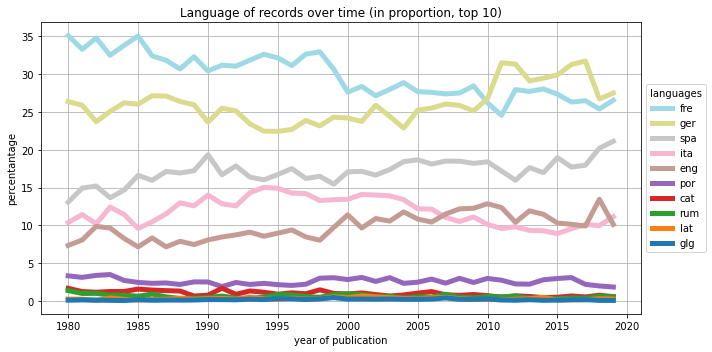

In [78]:
visualize.plot_lines(years_languages_rel_df.iloc[:,0:10], title = "Language of records over time (in proportion, top 10)",
cmap = cmap_20, xlabel = "year of publication", ylabel = "percentantage", figure_name = "figure_05_plot_lines_languages",
title_legend = "languages"
)

In [79]:
languages_rel_df = (df[languages_lt].sum().div(df.shape[0])*100).round(2)

In [80]:
languages_rel_df

fre    33.48
ger    29.17
spa    19.44
ita    13.66
eng    11.21
por     2.92
cat     1.08
rum     0.68
lat     0.35
glg     0.22
rus     0.14
fro     0.13
oci     0.08
pol     0.08
roh     0.08
dut     0.08
ara     0.05
frm     0.04
swe     0.03
dtype: float64

In [81]:
round(df[languages_lt].sum().div(df.shape[0])*100,2).sort_values(ascending=True)

swe     0.03
frm     0.04
ara     0.05
dut     0.08
roh     0.08
pol     0.08
oci     0.08
fro     0.13
rus     0.14
glg     0.22
lat     0.35
rum     0.68
cat     1.08
por     2.92
eng    11.21
ita    13.66
spa    19.44
ger    29.17
fre    33.48
dtype: float64

C:\Users\calvotello\Dropbox\MTB\Göttingen\research\librarian_robot\visualize.py:181: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


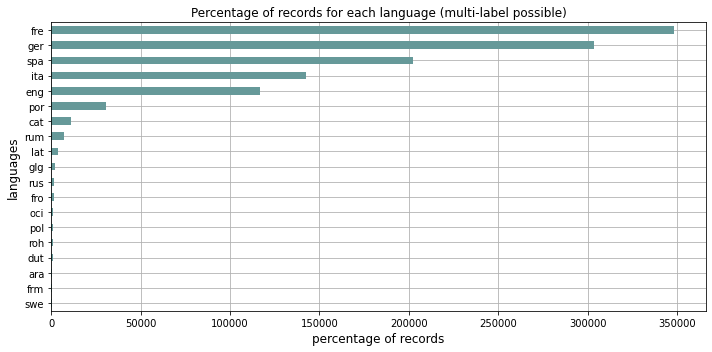

In [82]:
visualize.plot_bars(df[languages_lt], title = "Percentage of records for each language (multi-label possible)", xlabel= "percentage of records", ylabel = "languages", figure_name = "bar_languages")

In [83]:
languages_rel_df

fre    33.48
ger    29.17
spa    19.44
ita    13.66
eng    11.21
por     2.92
cat     1.08
rum     0.68
lat     0.35
glg     0.22
rus     0.14
fro     0.13
oci     0.08
pol     0.08
roh     0.08
dut     0.08
ara     0.05
frm     0.04
swe     0.03
dtype: float64

In [84]:
years_languages_rel_df

fre    ger    spa    ita    eng   por   cat   rum   lat  \
year_publication                                                              
1980              35.10  26.38  13.07  10.38   7.35  3.32  1.67  1.37  0.24   
1981              33.29  25.90  14.93  11.43   8.07  3.12  1.24  0.99  0.23   
1982              34.79  23.72  15.20  10.21   9.86  3.38  1.15  1.00  0.08   
1983              32.50  25.07  13.65  12.41   9.64  3.49  1.25  0.77  0.39   
1984              33.81  26.21  14.67  11.44   8.27  2.71  1.25  0.77  0.21   
1985              35.05  26.03  16.62   9.59   7.15  2.45  1.57  0.62  0.10   
1986              32.43  27.15  15.96  10.46   8.34  2.33  1.44  0.91  0.18   
1987              31.84  27.11  17.13  11.52   7.16  2.38  1.36  0.54  0.22   
1988              30.69  26.39  16.93  12.98   7.89  2.18  1.31  0.33  0.35   
1989              32.30  25.96  17.22  12.58   7.46  2.52  0.65  0.36  0.23   
1990              30.43  23.65  19.34  14.01   8.07  2.51  0.76  0.43  0.29   
1991              31.19  25.50  16.69  12.85   8.46  1.90  1.68  0.65  0.33   
1992              31.06  25.14  17.87  12.57   8.74  2.44  0.88  0.37  0.24   
1993              31.86  23.43  16.38  14.32   9.10  2.18  1.32  0.30  0.51   
1994              32.64  22.46  16.03  15.03   8.56  2.33  1.15  0.51  0.26   
1995              32.15  22.44  16.73  14.90   8.97  2.15  0.89  0.84  0.20   
1996              31.14  22.69  17.51  14.27   9.39  2.05  1.07  0.81  0.37   
1997              32.65  23.88  16.20  14.20   8.47  2.21  0.95  0.58  0.24   
1998              32.96  23.16  16.49  13.29   8.03  3.01  1.47  0.48  0.29   
1999              30.66  24.32  15.45  13.39   9.73  3.07  0.99  0.85  0.54   
2000              27.62  24.20  17.08  13.45  11.40  2.83  0.92  0.94  0.43   
2001              28.38  23.75  17.15  14.09   9.65  3.11  1.06  0.84  0.65   
2002              27.15  25.89  16.65  14.02  10.90  2.58  0.84  0.60  0.54   
2003              27.99  24.43  17.38  13.90  10.56  3.08  0.65  0.61  0.43   
2004              28.88  22.87  18.43  13.41  11.78  2.33  0.79  0.36  0.34   
2005              27.69  25.24  18.67  12.19  10.83  2.48  1.03  0.54  0.27   
2006              27.60  25.52  18.11  12.15  10.44  2.89  1.24  0.51  0.43   
2007              27.39  26.05  18.50  11.05  11.50  2.35  0.81  0.88  0.47   
2008              27.51  25.87  18.49  10.51  12.18  2.99  0.74  0.49  0.30   
2009              28.46  25.14  18.20  11.11  12.26  2.44  0.85  0.42  0.20   
2010              26.20  26.78  18.41  10.12  12.86  2.98  0.70  0.58  0.21   
2011              24.55  31.51  17.19   9.58  12.36  2.74  0.49  0.54  0.16   
2012              27.96  31.33  15.97   9.81  10.41  2.25  0.68  0.63  0.22   
2013              27.72  29.12  17.64   9.33  11.92  2.22  0.59  0.35  0.29   
2014              28.05  29.47  16.97   9.28  11.46  2.80  0.44  0.43  0.48   
2015              27.35  29.91  18.96   8.91  10.31  2.97  0.49  0.28  0.10   
2016              26.32  31.28  17.71   9.55  10.14  3.09  0.66  0.40  0.15   
2017              26.49  31.74  17.96  10.11   9.91  2.19  0.53  0.36  0.14   
2018              25.39  26.72  20.21   9.97  13.44  1.98  0.75  0.62  0.29   
2019              26.56  27.50  21.12  11.15  10.12  1.84  0.57  0.55  0.25   

                   glg   rus   fro   oci   pol   roh   dut   ara   frm   swe  
year_publication                                                              
1980              0.10  0.42  0.23  0.04  0.18  0.05  0.04  0.00  0.03  0.06  
1981              0.13  0.07  0.20  0.01  0.00  0.22  0.04  0.06  0.00  0.08  
1982              0.10  0.27  0.02  0.06  0.01  0.08  0.01  0.06  0.00  0.00  
1983              0.08  0.24  0.32  0.12  0.01  0.05  0.00  0.02  0.00  0.00  
1984              0.05  0.16  0.18  0.11  0.02  0.06  0.07  0.00  0.00  0.01  
1985              0.18  0.14  0.13  0.11  0.03  0.13  0.09  0.00  0.01  0.00  
1986              0.09  0.17  0.17  0.21  0.03  0.04  0.01  0.02  0.0

In [85]:
years_languages_rel_df.diff()

fre   ger   spa   ita   eng   por   cat   rum   lat   glg  \
year_publication                                                               
1980               NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1981             -1.81 -0.48  1.86  1.05  0.72 -0.20 -0.43 -0.38 -0.01  0.03   
1982              1.50 -2.18  0.27 -1.22  1.79  0.26 -0.09  0.01 -0.15 -0.03   
1983             -2.29  1.35 -1.55  2.20 -0.22  0.11  0.10 -0.23  0.31 -0.02   
1984              1.31  1.14  1.02 -0.97 -1.37 -0.78  0.00  0.00 -0.18 -0.03   
1985              1.24 -0.18  1.95 -1.85 -1.12 -0.26  0.32 -0.15 -0.11  0.13   
1986             -2.62  1.12 -0.66  0.87  1.19 -0.12 -0.13  0.29  0.08 -0.09   
1987             -0.59 -0.04  1.17  1.06 -1.18  0.05 -0.08 -0.37  0.04  0.02   
1988             -1.15 -0.72 -0.20  1.46  0.73 -0.20 -0.05 -0.21  0.13  0.00   
1989              1.61 -0.43  0.29 -0.40 -0.43  0.34 -0.66  0.03 -0.12  0.01   
1990             -1.87 -2.31  2.12  1.43  0.61 -0.01  0.11  0.07  0.06  0.06   
1991              0.76  1.85 -2.65 -1.16  0.39 -0.61  0.92  0.22  0.04 -0.01   
1992             -0.13 -0.36  1.18 -0.28  0.28  0.54 -0.80 -0.28 -0.09 -0.02   
1993              0.80 -1.71 -1.49  1.75  0.36 -0.26  0.44 -0.07  0.27  0.08   
1994              0.78 -0.97 -0.35  0.71 -0.54  0.15 -0.17  0.21 -0.25 -0.05   
1995             -0.49 -0.02  0.70 -0.13  0.41 -0.18 -0.26  0.33 -0.06  0.12   
1996             -1.01  0.25  0.78 -0.63  0.42 -0.10  0.18 -0.03  0.17 -0.02   
1997              1.51  1.19 -1.31 -0.07 -0.92  0.16 -0.12 -0.23 -0.13 -0.09   
1998              0.31 -0.72  0.29 -0.91 -0.44  0.80  0.52 -0.10  0.05  0.08   
1999             -2.30  1.16 -1.04  0.10  1.70  0.06 -0.48  0.37  0.25  0.17   
2000             -3.04 -0.12  1.63  0.06  1.67 -0.24 -0.07  0.09 -0.11 -0.20   
2001              0.76 -0.45  0.07  0.64 -1.75  0.28  0.14 -0.10  0.22  0.01   
2002             -1.23  2.14 -0.50 -0.07  1.25 -0.53 -0.22 -0.24 -0.11 -0.02   
2003              0.84 -1.46  0.73 -0.12 -0.34  0.50 -0.19  0.01 -0.11  0.02   
2004              0.89 -1.56  1.05 -0.49  1.22 -0.75  0.14 -0.25 -0.09 -0.03   
2005             -1.19  2.37  0.24 -1.22 -0.95  0.15  0.24  0.18 -0.07  0.00   
2006             -0.09  0.28 -0.56 -0.04 -0.39  0.41  0.21 -0.03  0.16  0.03   
2007             -0.21  0.53  0.39 -1.10  1.06 -0.54 -0.43  0.37  0.04  0.15   
2008              0.12 -0.18 -0.01 -0.54  0.68  0.64 -0.07 -0.39 -0.17 -0.18   
2009              0.95 -0.73 -0.29  0.60  0.08 -0.55  0.11 -0.07 -0.10  0.00   
2010             -2.26  1.64  0.21 -0.99  0.60  0.54 -0.15  0.16  0.01  0.05   
2011             -1.65  4.73 -1.22 -0.54 -0.50 -0.24 -0.21 -0.04 -0.05 -0.14   
2012              3.41 -0.18 -1.22  0.23 -1.95 -0.49  0.19  0.09  0.06 -0.04   
2013             -0.24 -2.21  1.67 -0.48  1.51 -0.03 -0.09 -0.28  0.07  0.07   
2014              0.33  0.35 -0.67 -0.05 -0.46  0.58 -0.15  0.08  0.19 -0.08   
2015             -0.70  0.44  1.99 -0.37 -1.15  0.17  0.05 -0.15 -0.38  0.03   
2016             -1.03  1.37 -1.25  0.64 -0.17  0.12  0.17  0.12  0.05  0.05   
2017              0.17  0.46  0.25  0.56 -0.23 -0.90 -0.13 -0.04 -0.01  0.02   
2018             -1.10 -5.02  2.25 -0.14  3.53 -0.21  0.22  0.26  0.15 -0.11   
2019              1.17  0.78  0.91  1.18 -3.32 -0.14 -0.18 -0.07 -0.04  0.00   

                   rus   fro   oci   pol   roh   dut   ara   frm   swe  
year_publication                                                        
1980               NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1981             -0.35 -0.03 -0.03 -0.18  0.17  0.00  0.06 -0.03  0.02  
1982              0.20 -0.18  0.05  0.01 -0.14 -0.03  0.00  0.00 -0.08  
1983             -0.03  0.30  0.06  0.00 -0.03 -0.01 -0.04  0.00  0.00  
1984             -0.08 -0.14 -0.01  0.01  0.01  0.07 -0.02  0.00  0.01  
1985             -0.02 -0.05  0.00  0.01  0.07  0.02  0.00  0.01 -0.01  
1986              0.03  0.04  0.10  0.00 -0.09 -0.08  0.02  0.04  0.00  
1

In [86]:
years_languages_rel_df.diff().sum()

fre   -8.54
ger    1.12
spa    8.05
ita    0.77
eng    2.77
por   -1.48
cat   -1.10
rum   -0.82
lat    0.01
glg   -0.03
rus   -0.36
fro   -0.12
oci   -0.04
pol   -0.14
roh   -0.03
dut   -0.04
ara    0.01
frm   -0.03
swe   -0.04
dtype: float64

C:\Users\calvotello\Dropbox\MTB\Göttingen\research\librarian_robot\visualize.py:181: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


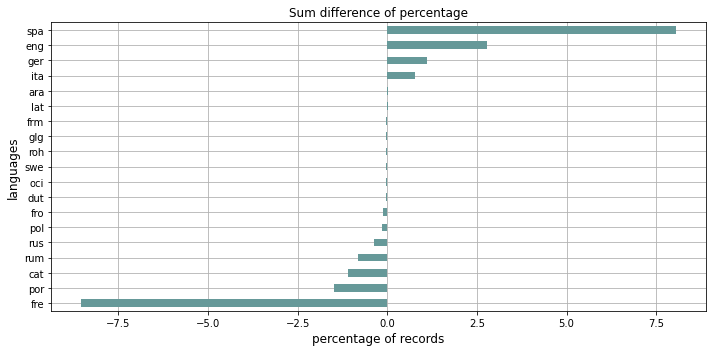

In [87]:
visualize.plot_bars(years_languages_rel_df.diff(), percentage = False, title = "Sum difference of percentage", xlabel= "percentage of records", ylabel = "languages", figure_name = "bar_diff_languages")

In [88]:
regression_results_languages_df = statistical_tests.calculate_regression_line(years_languages_rel_df)


In [89]:
regression_results_languages_df

column     slope   intercept    rvalue        pvalue    stderr
column                                                               
ger       ger  0.112714 -199.348660  0.514517  6.823417e-04  0.030473
eng       eng  0.111268 -212.652451  0.767824  7.387798e-09  0.015061
spa       spa  0.095735 -174.299426  0.699182  5.202403e-07  0.015880
dut       dut  0.002256   -4.442817  0.458632  2.916469e-03  0.000709
frm       frm  0.001886   -3.732790  0.494164  1.191630e-03  0.000538
glg       glg  0.001039   -1.896280  0.138212  3.950453e-01  0.001208
lat       lat  0.000659   -1.022370  0.057680  7.236922e-01  0.001852
pol       pol  0.000312   -0.557859  0.046429  7.760374e-01  0.001090
ara       ara  0.000201   -0.356901  0.057579  7.241569e-01  0.000565
swe       swe  0.000062   -0.100296  0.027867  8.644671e-01  0.000360
roh       roh -0.001154    2.379615 -0.257105  1.092516e-01  0.000704
fro       fro -0.001235    2.590052 -0.214939  1.828874e-01  0.000911
oci       oci -0.001563    3.197922 -0.453002  3.332437e-03  0.000499
rus       rus -0.003089    6.305442 -0.400664  1.040718e-02  0.001146
por       por -0.007763   18.118197 -0.210042  1.933042e-01  0.005862
rum       rum -0.009479   19.564235 -0.464972  2.503165e-03  0.002928
cat       cat -0.022482   45.925112 -0.769120  6.725410e-09  0.003031
ita       ita -0.056659  125.176744 -0.362384  2.156374e-02  0.023639
fre       fre -0.223000  475.733500 -0.900454  2.588174e-15  0.017474

In [90]:
regression_results_languages_df["expectation_2030"] = (regression_results_languages_df["slope"] * 2030) + regression_results_languages_df["intercept"]

In [91]:
regression_results_languages_df["expectation_2040"] = (regression_results_languages_df["slope"] * 2040) + regression_results_languages_df["intercept"]

In [92]:
regression_results_languages_df.loc[(regression_results_languages_df["pvalue"] < 0.001) & (regression_results_languages_df["slope"] > 0) ].round(2)

column  slope  intercept  rvalue  pvalue  stderr  expectation_2030  \
column                                                                      
ger       ger   0.11    -199.35    0.51     0.0    0.03             29.46   
eng       eng   0.11    -212.65    0.77     0.0    0.02             13.22   
spa       spa   0.10    -174.30    0.70     0.0    0.02             20.04   

        expectation_2040  
column                    
ger                30.59  
eng                14.33  
spa                21.00

In [93]:
regression_results_languages_df.loc[(regression_results_languages_df["pvalue"] < 0.001) & (regression_results_languages_df["slope"] < 0) ].round(2)

column  slope  intercept  rvalue  pvalue  stderr  expectation_2030  \
column                                                                      
cat       cat  -0.02      45.93   -0.77     0.0    0.00              0.29   
fre       fre  -0.22     475.73   -0.90     0.0    0.02             23.04   

        expectation_2040  
column                    
cat                 0.06  
fre                20.81

In [94]:
visualize.plot_bars(regression_results_languages_df.loc[regression_results_languages_df["pvalue"] < 0.001][["slope"]].T, title ="Slope of regression test of each language (p-value < 0.001)", xlabel ="slope", ylabel = "languages", figure_name = "figure_06_bar_slop_language", figsize=(8,5))

C:\Users\calvotello\Dropbox\MTB\Göttingen\research\librarian_robot\visualize.py:181: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


# Pages

In [95]:
ppns_lt = ["278864376",
"1612842208",
"34184957X",
"798179643",
"745009786",
"228112982",
"489256120",
"1604428902",
"1132286107",
"1604360445"]

In [96]:
df.loc[ppns_lt].groupby("title").head(1)[["title", "pages"]].sample(10).sort_index()

title             pages
ppn                                                                        
1132286107                              Antología poética             128 S
1604360445  Everest diccionario práctico de americanismos            238 S.
1604428902                    Crônica da casa assassinada    XXXVII, 810 S.
1612842208                           La @mort d'Agrippine       XXIV, 90 S.
228112982                             Gewohnheit - heilen            476 S.
278864376         Cultures of the Aztecs, Mayas and Incas            216 S.
34184957X           Regards sur la littérature québécoise             312 p
489256120                                  French studies  Online-Ressource
745009786   Revista de Cancioneros Impresos y Manuscritos  Online-Ressource
798179643     Der @französische Wortschatz der Vorklassik        377 Seiten

In [97]:
df["pages_extracted"] = df["pages"].str.findall("\d+").str.get(0)

In [98]:
df["pages_extracted"] = df["pages_extracted"].fillna(np.NaN).astype(float)

In [99]:
round(df["pages"].notna().sum() / df.shape[0], 2)*100

95.0

In [100]:
round(df["pages_extracted"].notna().sum() / df.shape[0], 2)*100

91.0

In [101]:
df.loc[ppns_lt].groupby("title").head(1)[["title", "pages", "pages_extracted"]].sample(10).sort_index()

title             pages  \
ppn                                                                           
1132286107                              Antología poética             128 S   
1604360445  Everest diccionario práctico de americanismos            238 S.   
1604428902                    Crônica da casa assassinada    XXXVII, 810 S.   
1612842208                           La @mort d'Agrippine       XXIV, 90 S.   
228112982                             Gewohnheit - heilen            476 S.   
278864376         Cultures of the Aztecs, Mayas and Incas            216 S.   
34184957X           Regards sur la littérature québécoise             312 p   
489256120                                  French studies  Online-Ressource   
745009786   Revista de Cancioneros Impresos y Manuscritos  Online-Ressource   
798179643     Der @französische Wortschatz der Vorklassik        377 Seiten   

            pages_extracted  
ppn                          
1132286107            128.0  
1604360445            238.0  
1604428902            810.0  
1612842208             90.0  
228112982             476.0  
278864376             216.0  
34184957X             312.0  
489256120               NaN  
745009786               NaN  
798179643             377.0

In [102]:
sample_1000_df = df.loc[(df["year_publication"].notna()) & (df["pages_extracted"].notna()) & (df["pages_extracted"]< 500 ) & (df["pages_extracted"]> 10 )].sample(1000, random_state=2021)

In [103]:
sample_10000_df = df.loc[(df["year_publication"].notna()) & (df["pages_extracted"].notna()) & (df["pages_extracted"]< 500 ) & (df["pages_extracted"]> 10 )].sample(10000, random_state=2021)

In [104]:
df_no_na = df.loc[(df["year_publication"].notna()) & (df["pages_extracted"].notna()) & (df["pages_extracted"]< 500 ) & (df["pages_extracted"]> 10 )]

In [105]:
sample_1000_df.plot.scatter("year_publication", "pages_extracted", color = color)

<AxesSubplot:xlabel='year_publication', ylabel='pages_extracted'>

In [106]:
def plot_scatter_w_regression_line(df, x_column = "", y_column = "", color = color, title = "", xlabel = "", ylabel = "", outdir = "./../visualizations/", figure_name = "scatter_w_regression_line_"):
    

    ax = sns.regplot(x = x_column, y = y_column, data = df, color = color)

    ax.set_axisbelow(True)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    fig = ax.get_figure()
    fig.savefig( outdir + figure_name + ".png", dpi=300, format="png")


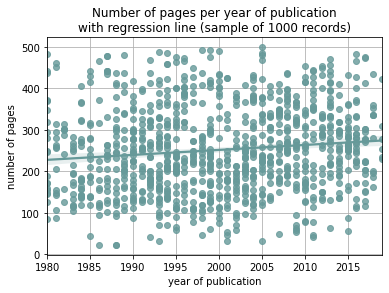

In [107]:
visualize.plot_scatter_w_regression_line(sample_1000_df, x_column = "year_publication",
y_column = "pages_extracted", title = "Number of pages per year of publication\nwith regression line (sample of 1000 records)",
xlabel = "year of publication", ylabel = "number of pages",
figure_name = "figure_4_scatter_year_publication_pages",
grid=True
)

In [108]:
results = stats.linregress(sample_1000_df["year_publication"], sample_1000_df["pages_extracted"])
results


LinregressResult(slope=1.1945134242620319, intercept=-2137.306836107696, rvalue=0.1193636117117237, pvalue=0.0001546870328767893, stderr=0.3145123609170774)

In [109]:
results = stats.linregress(sample_10000_df["year_publication"], sample_10000_df["pages_extracted"])
results


LinregressResult(slope=0.8842732693727873, intercept=-1520.4467361318918, rvalue=0.08688298705571729, pvalue=3.2130827974992555e-18, stderr=0.10140276558118634)

In [110]:
results = stats.linregress(df_no_na["year_publication"], df_no_na["pages_extracted"])
results

#calculate_regression(df.loc[(df["year_publication"].notna()) & (df["pages_extracted"].notna()) & (df["pages_extracted"]< 500 ) & (df["pages_extracted"]> 10 )].sample(1000, random_state=2021), "year_publication", "pages_extracted")

LinregressResult(slope=0.9010715292313763, intercept=-1552.0424035525757, rvalue=0.08827789998879157, pvalue=0.0, stderr=0.011555920806265713)

In [111]:
df_no_na.loc[df_no_na["year_publication"] == 1980]["pages_extracted"].median()

219.0

In [112]:
df_no_na.loc[df_no_na["year_publication"] == 2019]["pages_extracted"].median()

256.0

In [113]:
df_no_na.loc[df_no_na["year_publication"] == 2019]["pages_extracted"].median() + (11 * results[0])

265.91178682154515

In [114]:
(results[0] * 2019) + results[1]

267.2210139655731

In [115]:
(results[0] * 2030) + results[1]

277.1328007871182

In [116]:
(results[0] * 2040) + results[1]

286.14351607943195

# Format

In [117]:
df["format"].notna().sum() / df.shape[0] * 100

28.171639819931094

In [118]:
df["format"].value_counts()

21 cm                              59168
24 cm                              57871
23 cm                              38303
22 cm                              34661
25 cm                              13193
                                   ...  
19 cm, 916 Gramm                       1
20 cm x 13.4 cm                        1
30 cm, 474 gr.                         1
12 cm, Behältnis 15 x 13 x 3 cm        1
225 mm x 155 mm, 510 g                 1
Name: format, Length: 2317, dtype: int64

In [119]:
#df["format_extracted"]
df["format_extracted"] = df["format"].str.findall("(\d+) cm").str.get(0)

In [120]:
df["format_extracted"].notna().sum() / df.shape[0] * 100

26.243496417927364

In [121]:
df["format_extracted"] = df["format_extracted"].fillna(np.NaN).astype(float)

In [122]:
df["format_extracted"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

In [123]:
sorted(df["format_extracted"].unique())

[nan,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 41.0,
 42.0,
 43.0,
 47.0,
 49.0,
 54.0,
 62.0,
 68.0,
 84.0,
 89.0,
 117.0,
 205.0,
 210.0,
 212.0,
 223.0,
 225.0,
 235.0,
 243.0,
 297.0]

<AxesSubplot:>

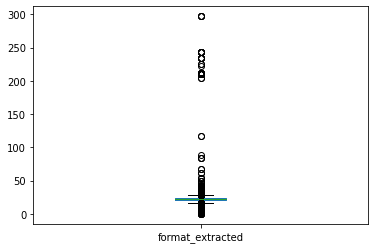

In [124]:
df["format_extracted"].plot.box()

In [125]:
sample_1000_df = df.loc[(df["year_publication"].notna()) & (df["format_extracted"].notna())  & (df["format_extracted"] < 200)  ].sample(1000, random_state=2021)

In [126]:
sample_10000_df = df.loc[(df["year_publication"].notna()) & (df["format_extracted"].notna()) ].sample(10000, random_state=2021)

In [127]:
df_no_na = df.loc[(df["year_publication"].notna()) & (df["format_extracted"].notna()) & (df["format_extracted"]< 100 ) & (df["format_extracted"]> 10 )]

In [128]:
sample_1000_df.plot.scatter("year_publication", "format_extracted")

<AxesSubplot:xlabel='year_publication', ylabel='format_extracted'>

In [129]:
df_no_na = df.loc[(df["year_publication"].notna()) & (df["format_extracted"].notna())]

In [130]:
visualize.plot_scatter_w_regression_line(sample_1000_df, x_column = "year_publication",
y_column = "format_extracted", title = "Size of book per year of publication\nwith regression line (sample of 1000 records)",
xlabel = "year of publication", ylabel = "format size",
figure_name = "scatter_year_publication_format"
)

In [131]:
#sns.regplot(x="year_publication", y="format_extracted", data = df_no_na, color = color)


In [132]:
results = stats.linregress(sample_1000_df["year_publication"], sample_1000_df["format_extracted"])
results

LinregressResult(slope=-0.016898808791939956, intercept=55.56727130179432, rvalue=-0.04632066567348689, pvalue=0.14326452791684155, stderr=0.011535850437958175)

In [133]:
results = stats.linregress(sample_10000_df["year_publication"], sample_10000_df["format_extracted"])
results

LinregressResult(slope=-0.009330621649825442, intercept=40.41678059568771, rvalue=-0.024394487215746375, pvalue=0.01470732704557371, stderr=0.003824133622520698)

In [134]:
results = stats.linregress(df_no_na["year_publication"], df_no_na["format_extracted"])
results

LinregressResult(slope=-0.00376193180858312, intercept=29.303432476486876, rvalue=-0.007836555246316941, pvalue=4.196847399595852e-05, stderr=0.0009183431978865066)

In [135]:
df_no_na.loc[df_no_na["year_publication"]== 1980]["format_extracted"].mean()

20.68230277185501

In [136]:
df_no_na.loc[df_no_na["year_publication"]== 2019]["format_extracted"].mean()

21.305890830480994